In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\ameen\Logistic Regression Dummy Data v3.csv")
df.head(5)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [4]:
df.shape

(1006, 14)

## Data Preprossecing

In [5]:
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [6]:
df[df['Age'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Droping null values 
df=df.dropna(subset='Employment History')

# Checking null values
print(df.isnull().sum())

#print shape
print(df.shape)

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64
(1001, 14)


In [8]:
# Investiget all elements in each feature 
import numpy as np

for column in df:
    unique_values = np.unique(df[column])
    nr_unique = len(unique_values)
    
    if nr_unique < 10:
        print("The number of values for feature '{}' is: {} -- {}".format(column, nr_unique, unique_values))
    else:
        print("The number of values for feature '{}' is: {}".format(column, nr_unique))



The number of values for feature 'Type of Account' is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature 'Account History' is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature 'Reason for the Loan' is: 10
The number of values for feature 'Loan Amount' is: 911
The number of values for feature 'Account Savings' is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature 'Employment History' is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature 'Individual Stauts' is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature 'Other Loans' is: 2 -- ['No' 'Yes']
The number of values for feature 'Security / Collateral' is: 4 -- ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
The number of values for feature 'Age' is: 57
The number of values for feature 'Residence Status' is: 3 -- ['Free' 'House Owner' '

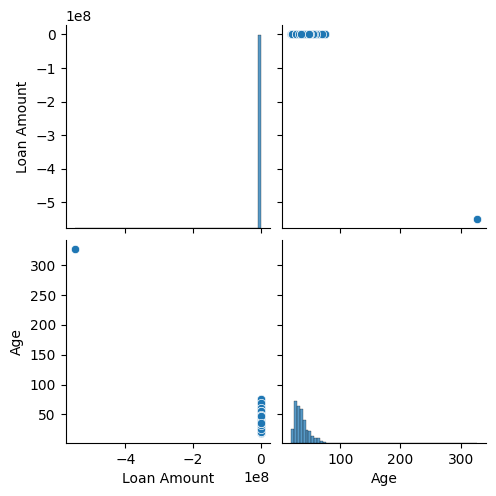

In [9]:
# Visulising data 
g = sns.pairplot(df)


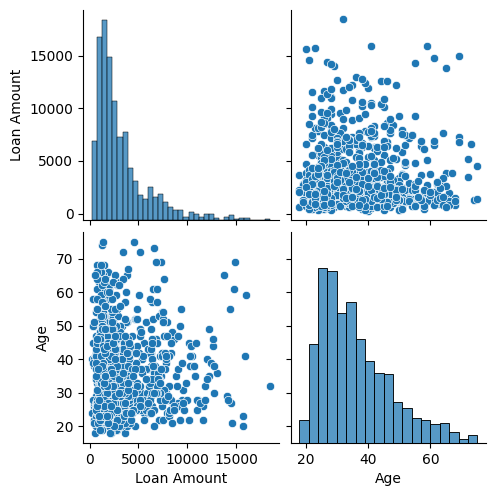

In [10]:
# Deleting Outliers 

df=df[df['Age']<100]
h = sns.pairplot(df)


In [11]:
df.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

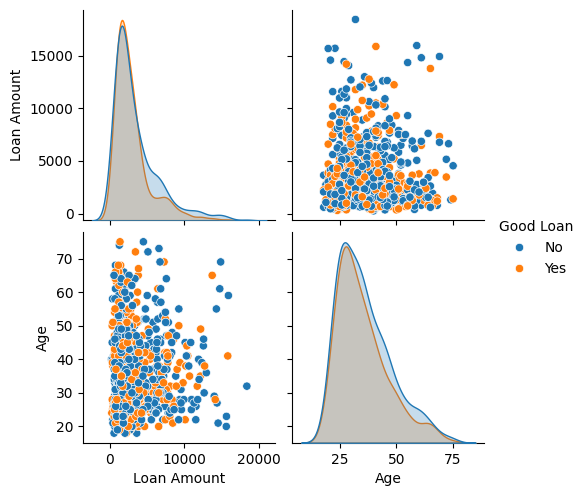

In [12]:
h = sns.pairplot(df,hue='Good Loan')

<Axes: xlabel='Good Loan', ylabel='count'>

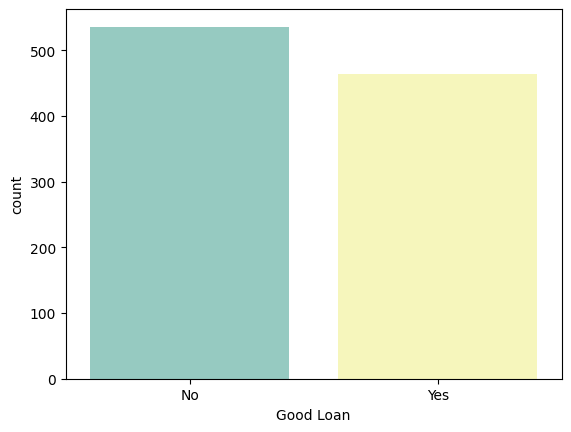

In [13]:
sns.countplot(x="Good Loan",data=df,hue='Good Loan',palette="Set3")

In [14]:
df.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

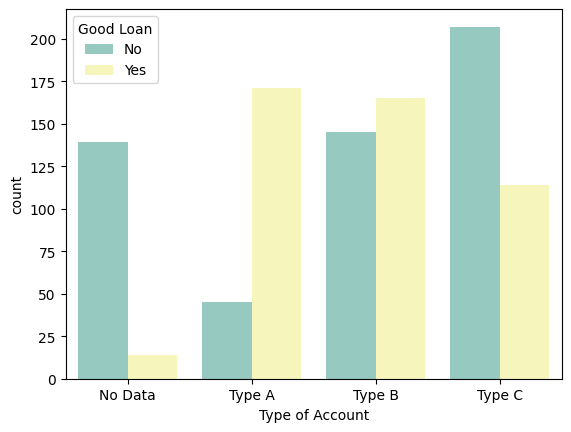

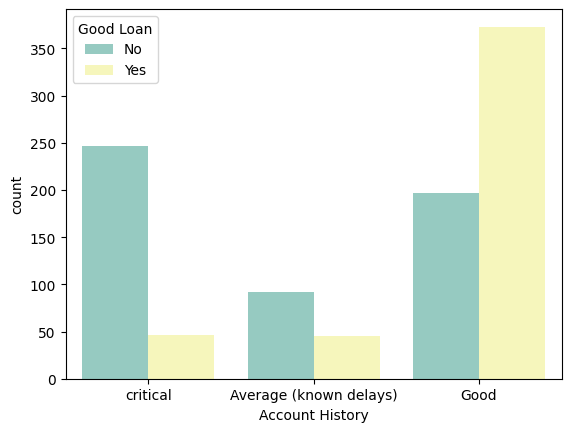

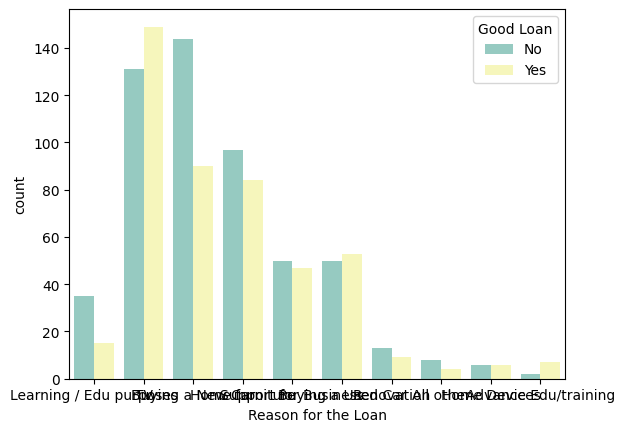

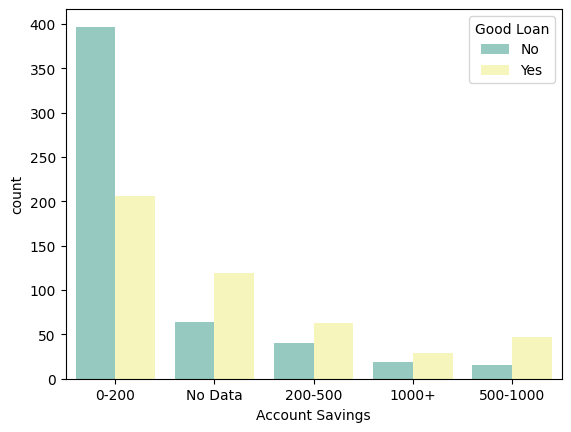

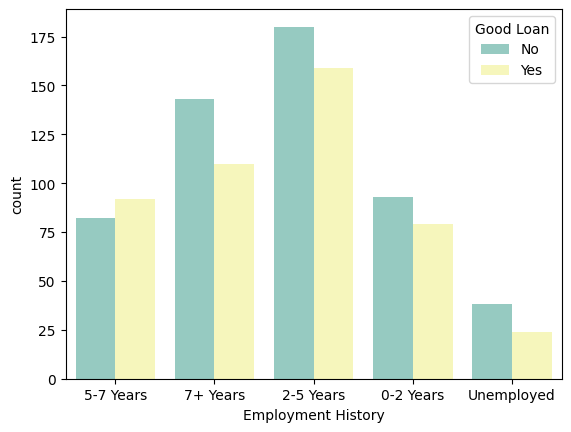

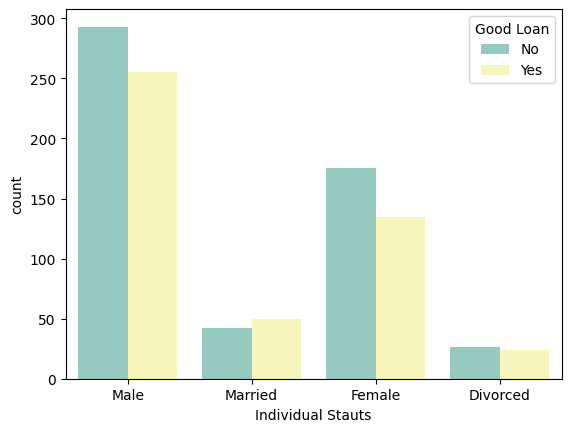

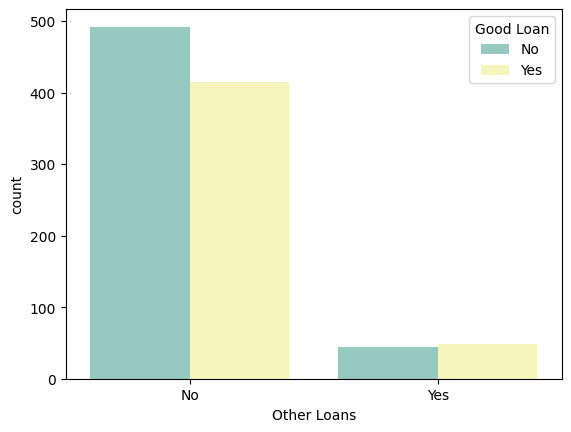

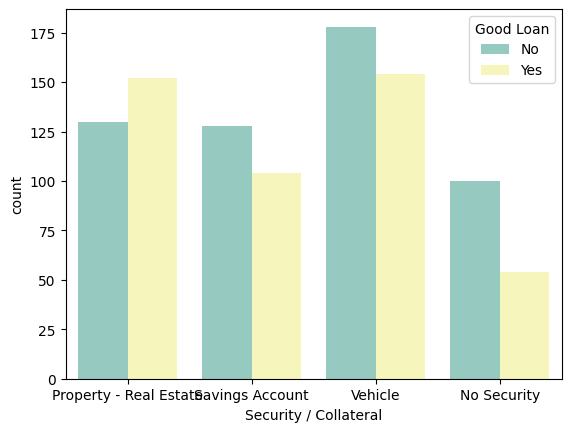

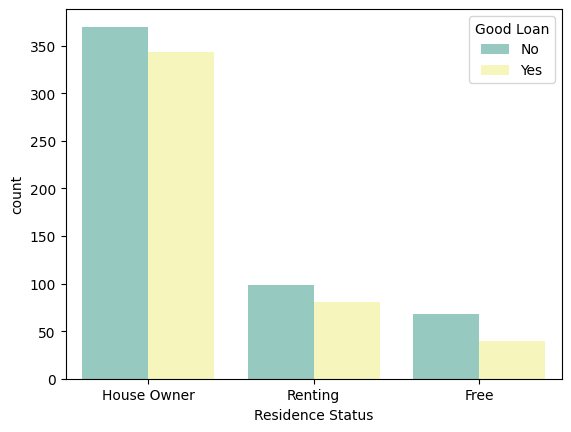

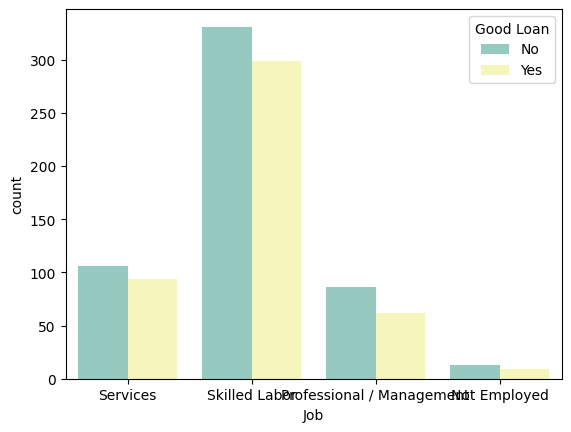

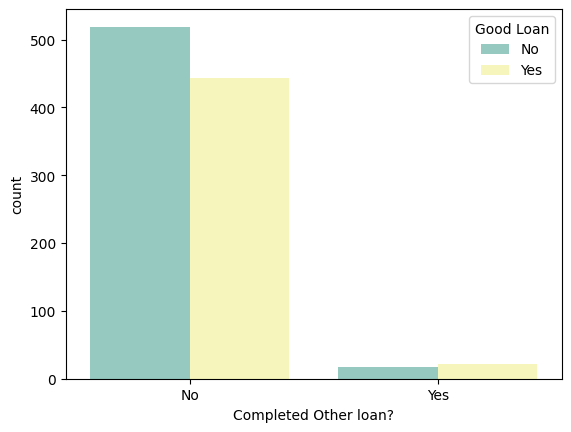

In [15]:
# Looping thhrough all the features by y  variabel to see if there is relationship

features =['Type of Account', 'Account History', 'Reason for the Loan',
        'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 
       'Residence Status', 'Job', 'Completed Other loan?']
for f in features:
    sns.countplot(x=f,data=df,hue="Good Loan",palette='Set3')
    plt.show()

In [16]:
# Makinng  categorical columns in to Numeric 
new_df=pd.get_dummies(df,columns = features,dtype=int)

# Before 
print(df.shape)

# After 
print(new_df.shape)

# Change y variable with 1 and 0
new_df['Good Loan'] = new_df['Good Loan'].map({'Yes': 1, 'No': 0})





(1000, 14)
(1000, 49)


In [17]:
new_df.head(5)

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [18]:
# Splitting the data in to X and Y 
X = new_df.drop('Good Loan', axis=1)
Y = new_df['Good Loan']
print(X.shape)
print(Y.shape)

(1000, 48)
(1000,)


# Feature selection 

In [19]:
dt = DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth = 10)
dt.fit(X,Y)

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:

fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance',ascending=False).reset_index(drop=True)

print(fi_df)

# Impotent features 
keep_features = fi_df['Feature'][0:40]


                                         Feature  Importance
0                          Account Savings_0-200    0.197515
1                           Account History_Good    0.191316
2                                    Loan Amount    0.121221
3                                            Age    0.079630
4                        Type of Account_No Data    0.054236
5                         Type of Account_Type A    0.049733
6                         Type of Account_Type C    0.026698
7                              Job_Skilled Labor    0.020597
8                                Other Loans_Yes    0.017520
9                        Account Savings_No Data    0.016471
10      Reason for the Loan_Support for Business    0.016358
11                        Reason for the Loan_TV    0.015758
12                         Account Savings_1000+    0.015515
13  Security / Collateral_Property - Real Estate    0.015355
14          Reason for the Loan_Buying a New Car    0.012188
15                      

In [21]:
keep_features.shape

(40,)

In [22]:
# print shape 
print(new_df.shape)
print(new_df[keep_features].shape)

(1000, 49)
(1000, 40)


In [23]:
# Spliting data in to x and y 
X=(new_df[keep_features])
Y=(new_df['Good Loan'])

print(X.shape)
print(Y.shape)

(1000, 40)
(1000,)


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1003
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Account Savings_0-200                         1000 non-null   int64  
 1   Account History_Good                          1000 non-null   int64  
 2   Loan Amount                                   1000 non-null   float64
 3   Age                                           1000 non-null   float64
 4   Type of Account_No Data                       1000 non-null   int64  
 5   Type of Account_Type A                        1000 non-null   int64  
 6   Type of Account_Type C                        1000 non-null   int64  
 7   Job_Skilled Labor                             1000 non-null   int64  
 8   Other Loans_Yes                               1000 non-null   int64  
 9   Account Savings_No Data                       1000 non-null   int64 

In [25]:
# Hold-Out Validation 

# First one
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=15)
# Second one 
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,train_size=0.9,test_size=0.1,random_state=15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_train.shape)
print(y_valid.shape)



(720, 40)
(200, 40)
(80, 40)
(720,)
(720,)
(80,)


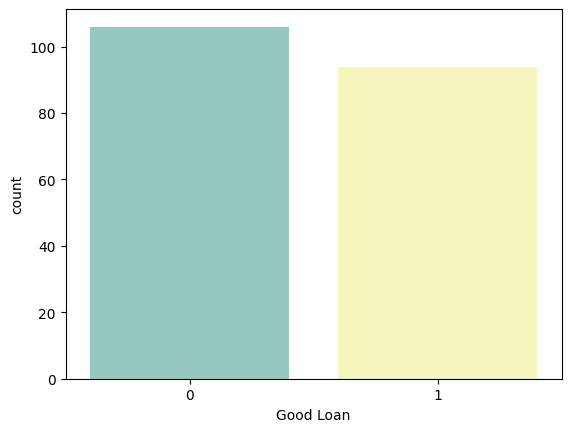

In [26]:
ax = sns.countplot(x=y_test,palette='Set3')

In [45]:
log_reg = LogisticRegression(random_state=10, solver='lbfgs',max_iter=2000)
log_reg.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,10
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [28]:
# Predict 
y_pred = log_reg.predict(x_train)

# Predict probability
pred_prob = log_reg.predict_proba(x_train)
print(pred_prob )

# Coefficiant of the featur in the decition function 
log_reg.coef_


[[0.65827257 0.34172743]
 [0.87197231 0.12802769]
 [0.26862411 0.73137589]
 ...
 [0.80028326 0.19971674]
 [0.92032541 0.07967459]
 [0.08962257 0.91037743]]


array([[-1.47630222e+00,  1.84596127e+00, -1.34287464e-04,
         9.33996869e-03, -1.48405925e+00,  9.26115674e-01,
        -2.62955594e-01, -5.16225941e-02,  2.84856034e-01,
         5.06996364e-01,  1.75898427e-01,  7.63425223e-02,
         2.92646971e-01,  4.47939581e-01, -7.15203577e-01,
        -1.43812908e-01,  6.12397766e-02, -4.60617808e-01,
         2.89183532e-01,  1.70950791e-01, -4.37402371e-01,
         2.83345083e-02, -1.02466828e-01,  5.43775722e-01,
        -1.71459701e-01,  9.37093382e-03,  4.53153302e-01,
         5.40062050e-02, -1.25210263e-02,  3.92668401e-01,
         1.24988319e-01, -2.50871339e-01,  1.37831644e-01,
        -1.43097776e-02, -3.04933792e-01,  1.05025051e-01,
        -2.11100769e-02,  2.24217521e-01, -2.55770188e-01,
        -1.61758445e-01]])

In [29]:
# Accuracy on Train 
print('Training Accuracy is:',log_reg.score(x_train,y_train))

# Accuracy on Test 
print('Training Accuracy is:',log_reg.score(x_test,y_test))

# Classification report 
print(classification_report(y_train,y_pred))

Training Accuracy is: 0.7861111111111111
Training Accuracy is: 0.765
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       387
           1       0.77      0.76      0.77       333

    accuracy                           0.79       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.79      0.79      0.79       720



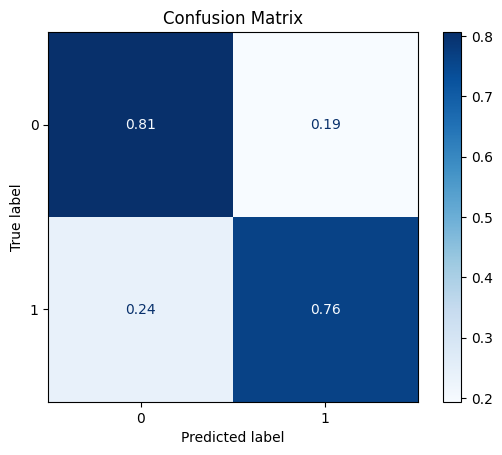

In [30]:
# Confusion_matrix
cm = confusion_matrix(y_train,y_pred)
cm_new = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Calculating True positive (Tp) , True negtive (Tn) , False positive(Fp) , False Negative (Fn)

Fp =  cm.sum(axis=0) - np.diag(cm)
Fn = cm.sum(axis=1) - np.diag(cm)
Tp = np.diag(cm)
Tn = cm.sum()-(Fp+Fn+Tp)

# True Positive Rate Or Recall 
# From all the acctual positive how much we catch correctly 

TPR = Tp / (Tp+Fn)
print('Recall Rate is :', TPR)

# Precision Or Positive Predictive Value 
# From all positive how much we predict corretly 

PPV = Tp / ( Tp+Fp )
print('Precission values is:',PPV)

# False Positive Rate 

FPR =  Fp / (Fp+Tn)
print('False Positive Rate is:',FPR)

# False Negative Rate Or Miss Rate 

FNR =  Fn / (Fn+Tp)
print('False Negattive Rate is :',FNR)



# Avg Rate 
print(" ")
print('Total Avg Recall is:',TPR.sum() / 2)
print('Total Avg Precission is:',PPV .sum() / 2)
print('Total Avg FPR is:',FPR.sum() / 2)
print('Total Avg FNRis:',FNR.sum() / 2)

Recall Rate is : [0.80620155 0.76276276]
Precission values is: [0.79795396 0.77203647]
False Positive Rate is: [0.23723724 0.19379845]
False Negattive Rate is : [0.19379845 0.23723724]
 
Total Avg Recall is: 0.7844821565751798
Total Avg Precission is: 0.7849952191792535
Total Avg FPR is: 0.21551784342482017
Total Avg FNRis: 0.21551784342482017


In [32]:
# Log Loss On Training 
print('Log Loss On Training is :',log_loss(y_train,pred_prob))

# Log Loss On Testing 
pred_prob_1 = log_reg.predict_proba(x_test)
print('Log Loss On Testing is :',log_loss(y_test,pred_prob_1 ))


Log Loss On Training is : 0.454365551581599
Log Loss On Testing is : 0.493505189604271


# Hyperparameter tuning 

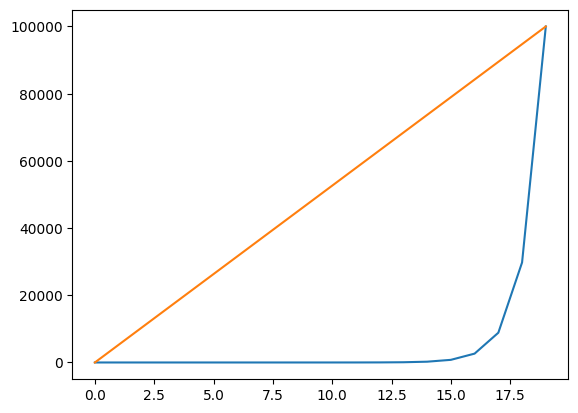

In [33]:
np.geomspace(1e-5,1e5,num = 20)

plt.plot(np.geomspace(1e-5,1e5,num = 20))
plt.plot(np.linspace(1e-5,1e5,num = 20))

In [34]:
C_list = np.geomspace(1e-5,1e5,num = 20)
CA = []
Logarithimic_Loss =  []
for c in C_list:
    log_reg2 = LogisticRegression(random_state=10, solver='lbfgs', C=c, max_iter=5000)
    log_reg2.fit(x_train, y_train)
    
    score = log_reg2.score(x_test, y_test)
    CA.append(score)
    
    print(f'The CA of C parameter {c} is {score}')
    
    pred_prob_t = log_reg2.predict_proba(x_test)
    log_loss_val = log_loss(y_test, pred_prob_t)
    Logarithimic_Loss.append(log_loss_val)
    

The CA of C parameter 1e-05 is 0.535
The CA of C parameter 3.359818286283781e-05 is 0.495
The CA of C parameter 0.00011288378916846884 is 0.515
The CA of C parameter 0.000379269019073225 is 0.555
The CA of C parameter 0.0012742749857031334 is 0.6
The CA of C parameter 0.004281332398719391 is 0.66
The CA of C parameter 0.01438449888287663 is 0.72
The CA of C parameter 0.04832930238571752 is 0.71
The CA of C parameter 0.1623776739188721 is 0.765
The CA of C parameter 0.5455594781168515 is 0.775
The CA of C parameter 1.8329807108324339 is 0.78
The CA of C parameter 6.1584821106602545 is 0.77
The CA of C parameter 20.6913808111479 is 0.765
The CA of C parameter 69.51927961775606 is 0.765
The CA of C parameter 233.57214690901213 is 0.765
The CA of C parameter 784.7599703514607 is 0.765
The CA of C parameter 2636.6508987303555 is 0.765
The CA of C parameter 8858.667904100832 is 0.765
The CA of C parameter 29763.51441631313 is 0.765
The CA of C parameter 100000.0 is 0.765


In [35]:
# Reshaping 
import pandas as pd

# After your loop finishes:

df_outcomes = pd.DataFrame({
    'C_list': C_list,
    'CA': CA,
    'Logarithimic_Loss': Logarithimic_Loss
})

# Sort by Logarithimic_Loss ascending
df_sorted = df_outcomes.sort_values('Logarithimic_Loss', ascending=True)

print(df_sorted)

# Print only the sorted DataFrame




           C_list     CA  Logarithimic_Loss
9        0.545559  0.775           0.489786
10       1.832981  0.780           0.489917
11       6.158482  0.770           0.490896
12      20.691381  0.765           0.491636
16    2636.650899  0.765           0.491980
13      69.519280  0.765           0.492017
18   29763.514416  0.765           0.492021
15     784.759970  0.765           0.492035
19  100000.000000  0.765           0.492036
14     233.572147  0.765           0.492062
17    8858.667904  0.765           0.492177
8        0.162378  0.765           0.496132
7        0.048329  0.710           0.521643
6        0.014384  0.720           0.573722
5        0.004281  0.660           0.634931
4        0.001274  0.600           0.673791
3        0.000379  0.555           0.689433
2        0.000113  0.515           0.694387
1        0.000034  0.495           0.695769
0        0.000010  0.535           0.696241


The CA of C parameter 1e-05 is 0.535


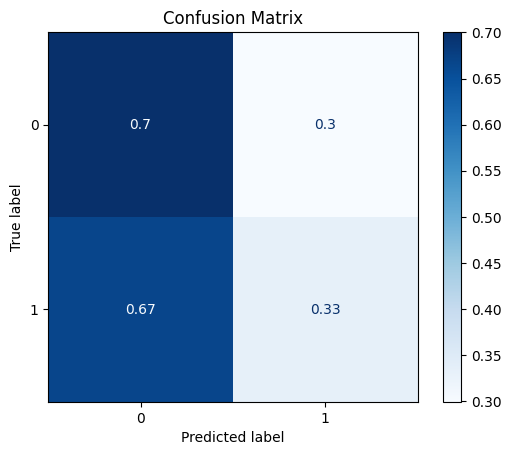

The CA of C parameter 3.359818286283781e-05 is 0.495


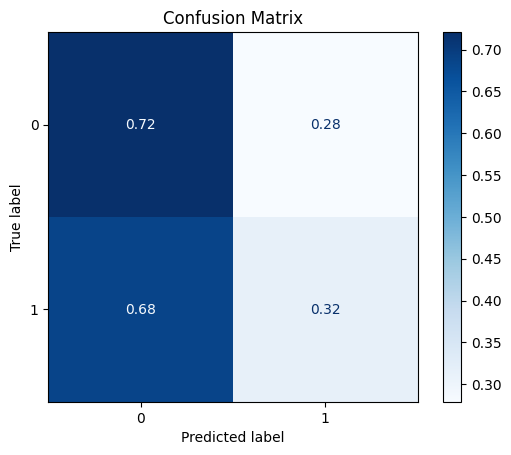

The CA of C parameter 0.00011288378916846884 is 0.515


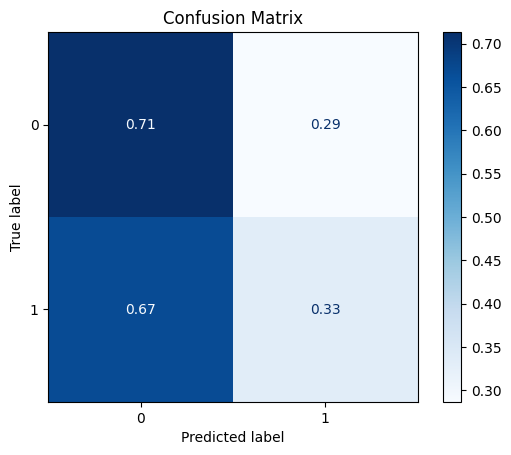

The CA of C parameter 0.000379269019073225 is 0.555


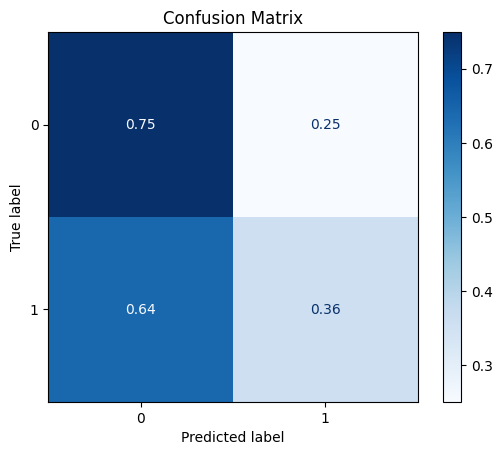

The CA of C parameter 0.0012742749857031334 is 0.6


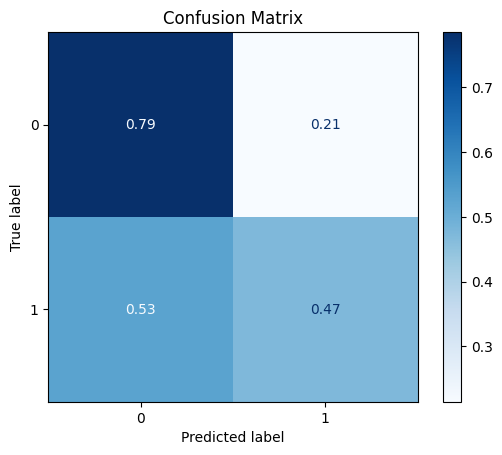

The CA of C parameter 0.004281332398719391 is 0.66


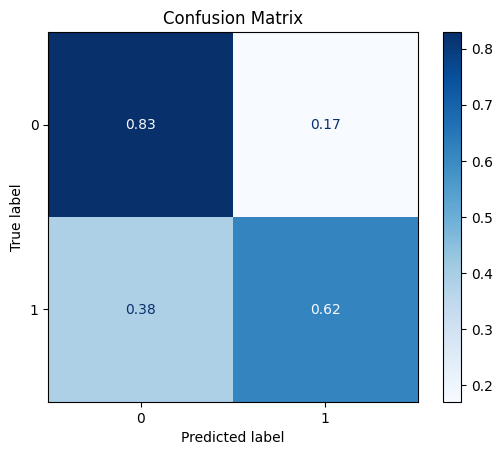

The CA of C parameter 0.01438449888287663 is 0.72


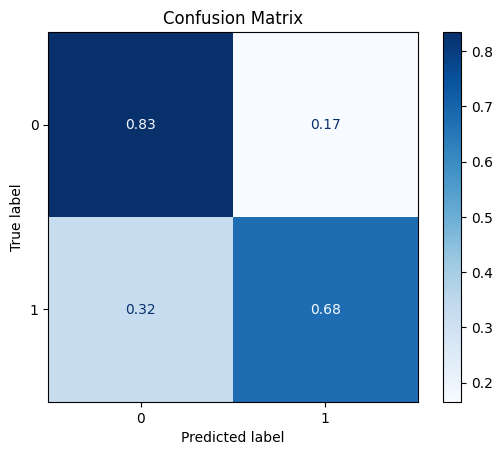

The CA of C parameter 0.04832930238571752 is 0.71


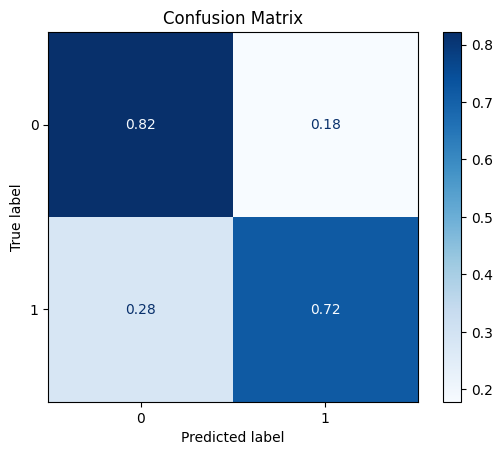

The CA of C parameter 0.1623776739188721 is 0.765


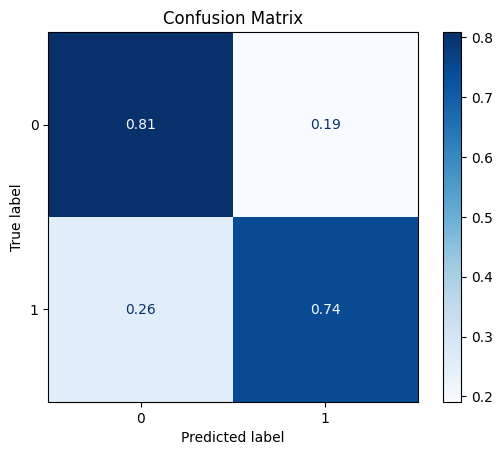

The CA of C parameter 0.5455594781168515 is 0.775


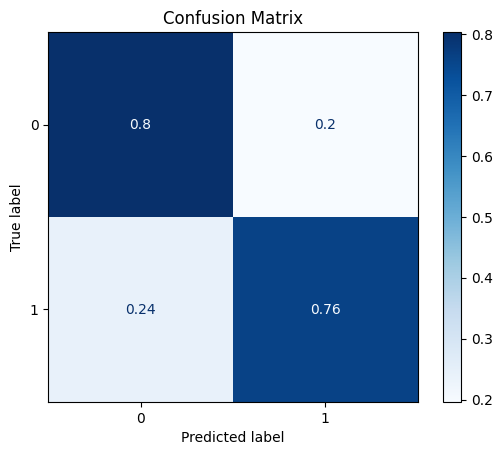

The CA of C parameter 1.8329807108324339 is 0.78


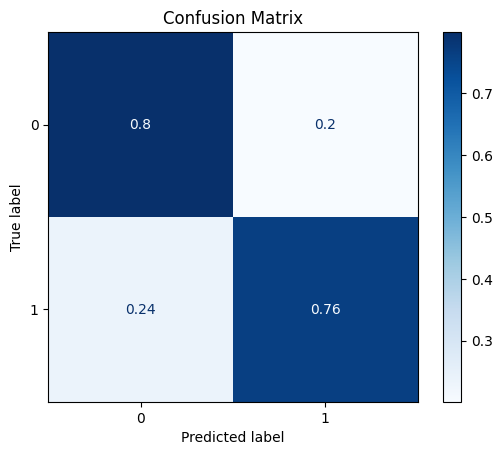

The CA of C parameter 6.1584821106602545 is 0.77


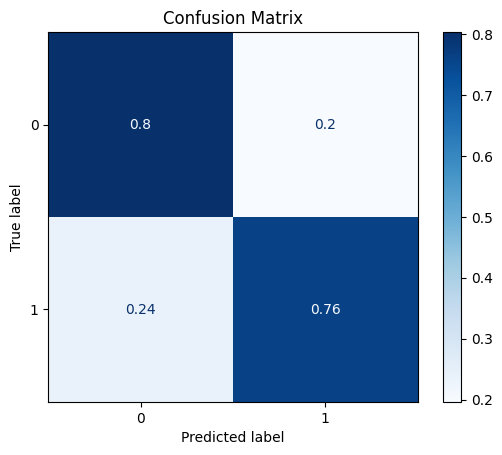

The CA of C parameter 20.6913808111479 is 0.765


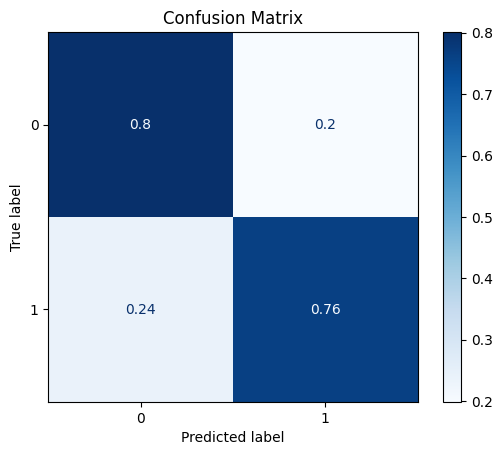

The CA of C parameter 69.51927961775606 is 0.765


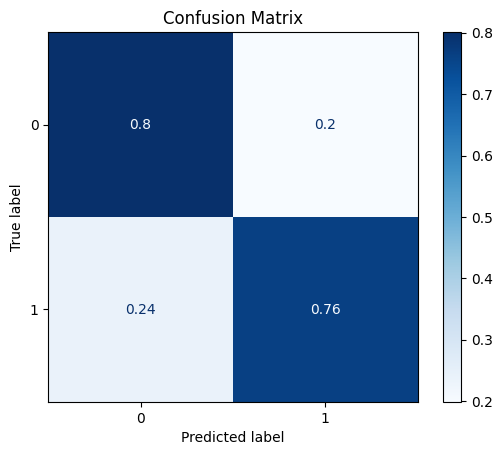

The CA of C parameter 233.57214690901213 is 0.765


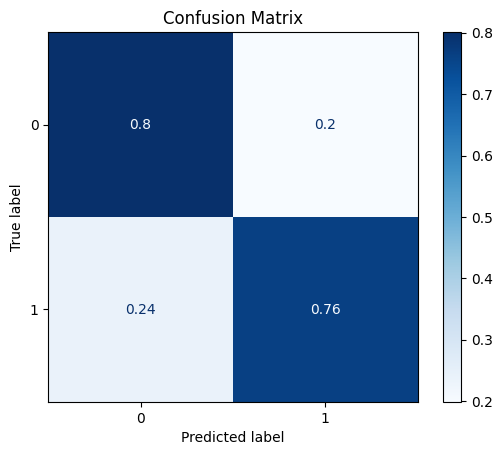

The CA of C parameter 784.7599703514607 is 0.765


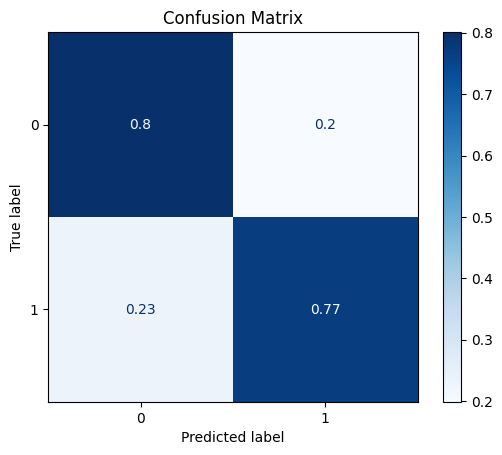

The CA of C parameter 2636.6508987303555 is 0.765


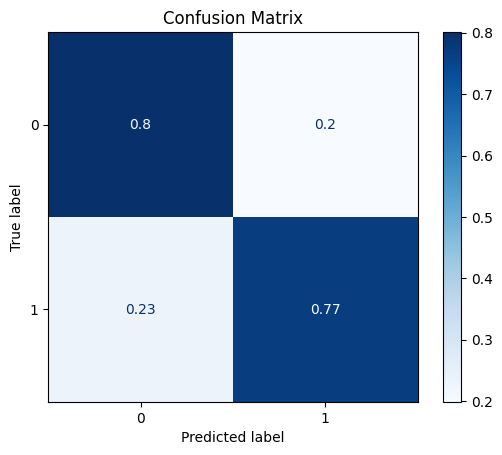

The CA of C parameter 8858.667904100832 is 0.765


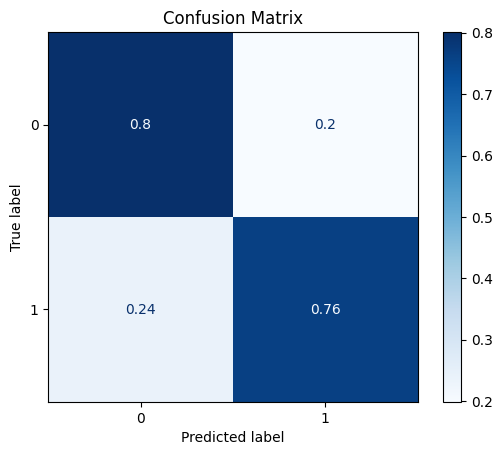

The CA of C parameter 29763.51441631313 is 0.765


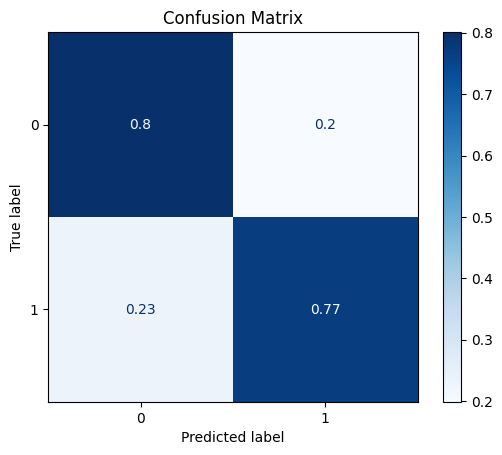

The CA of C parameter 100000.0 is 0.765


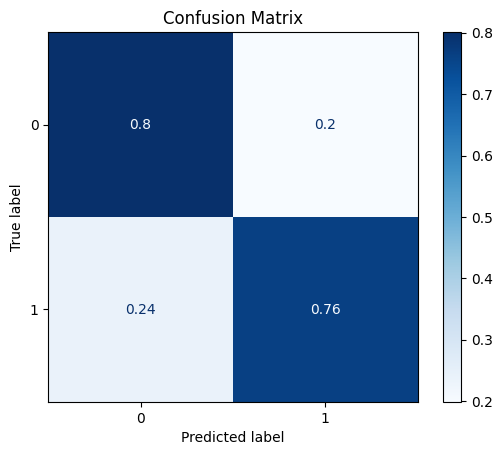

In [36]:
C_list = np.geomspace(1e-5,1e5,num = 20)
CA = []
Logarithimic_Loss =  []
for c in C_list:
    log_reg2 = LogisticRegression(random_state=10, solver='lbfgs', C=c, max_iter=5000)
    log_reg2.fit(x_train, y_train)
    
    score = log_reg2.score(x_test, y_test)
    CA.append(score)
    
    print(f'The CA of C parameter {c} is {score}')
    y_pred = log_reg2 .predict(x_train)
    cm = confusion_matrix(y_train,y_pred)
    cm_new = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=log_reg.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
 

In [37]:
Kf= KFold(n_splits=3, random_state=0, shuffle=True)

# List  of  C 

# Logistic reg CV
log_reg3 =  LogisticRegressionCV( cv=Kf ,random_state=15,Cs=C_list,max_iter=5000)
log_reg3.fit(x_train,y_train)
print('CA is :',log_reg3.score(x_test,y_test))
pred_prob_t = log_reg3.predict_proba(x_test)
log_loss_val3 = log_loss(y_test, pred_prob_t)
print('The loss is:',log_loss_val3 )

print ('optimal paremeter is',log_reg3.C_)

CA is : 0.775
The loss is: 0.48946820859653184
optimal paremeter is [0.54555948]


In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss

# Create and fit Dummy Classifier
Dummy_clf = DummyClassifier(strategy='most_frequent')
Dummy_clf.fit(x_train, y_train)

# Get accuracy score
score = Dummy_clf.score(x_test, y_test)

# Get predicted probabilities
pred_prob_t = Dummy_clf.predict_proba(x_test)

# Calculate log loss
log_loss_val3 = log_loss(y_test, pred_prob_t)

print('Testing score:', score)
print('Log loss:', log_loss_val3)



Testing score: 0.53
Log loss: 16.94051709288506


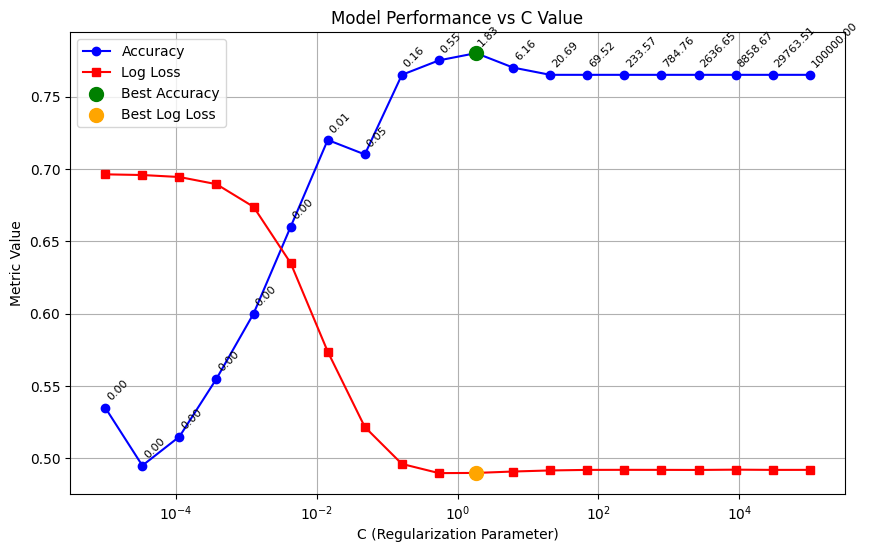

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Plot Accuracy
plt.plot(df_outcomes['C_list'], df_outcomes['CA'], marker='o', label='Accuracy', color='blue')

# Plot Log Loss
plt.plot(df_outcomes['C_list'], df_outcomes['Logarithimic_Loss'], marker='s', label='Log Loss', color='red')

# Find closest C to 1.832981
best_idx = (np.abs(df_outcomes['C_list'] - 1.832981)).idxmin()
best_C = df_outcomes.loc[best_idx, 'C_list']
best_acc = df_outcomes.loc[best_idx, 'CA']
best_loss = df_outcomes.loc[best_idx, 'Logarithimic_Loss']

# Highlight the best C value
plt.scatter(best_C, best_acc, color='green', s=100, zorder=5, label='Best Accuracy')
plt.scatter(best_C, best_loss, color='orange', s=100, zorder=5, label='Best Log Loss')

# Annotate C values on Accuracy line
for i, c_val in enumerate(df_outcomes['C_list']):
    plt.text(c_val, df_outcomes['CA'].iloc[i] + 0.005, f"{c_val:.2f}", fontsize=8, rotation=45)

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Metric Value')
plt.title('Model Performance vs C Value')
plt.legend()
plt.grid(True)
plt.show()


# Final model with selected paremeter

In [39]:
log_reg3 = LogisticRegression(random_state=10, solver='lbfgs', C=1.832981, max_iter=5000)
log_reg3.fit(x_train, y_train)
score = log_reg3.score(x_valid, y_valid)

    
pred_prob_t = log_reg3.predict_proba(x_valid)
log_loss_val = log_loss(y_valid, pred_prob_t)

print('Testing score:', score)
print('Log loss:',log_loss_val )


Testing score: 0.7625
Log loss: 0.43897668342342105
